In [1]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time # for timing processes
import random # for generating random values

### Constant Time

In [2]:
def take_first(my_list):
    return my_list[0]

In [3]:
short_list = [13, 25, 42]

In [4]:
tic = time.process_time()
first = take_first(short_list)
toc = time.process_time()

In [5]:
first

13

In [6]:
toc - tic

4.599999999932436e-05

In [16]:
long_list = [42] * 10**8

In [17]:
len(long_list)

100000000

In [18]:
tic = time.process_time()
first = take_first(long_list)
toc = time.process_time()

In [19]:
toc - tic

4.1000000001290005e-05

In [11]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [12]:
constant_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()
  
    constant_times.append(toc-tic)

In [13]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['n', 'time'])
constant_df

,n,time
0,10,1.500000e-05
1,100,1.000000e-06
2,1000,1.000000e-06
3,10000,1.000000e-06
4,100000,2.000000e-06
5,1000000,7.000000e-06
6,10000000,3.220000e-04


### Linear Time

In [20]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

In [21]:
tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

In [22]:
toc - tic

2.800000000036107e-05

In [23]:
largest

42

In [24]:
linear_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()
  
    linear_times.append(toc-tic)

In [25]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'time'])
linear_df

,n,time
0,10,0.000150
1,100,0.000004
2,1000,0.000018
3,10000,0.000153
4,100000,0.001520
5,1000000,0.016723
6,10000000,0.166433


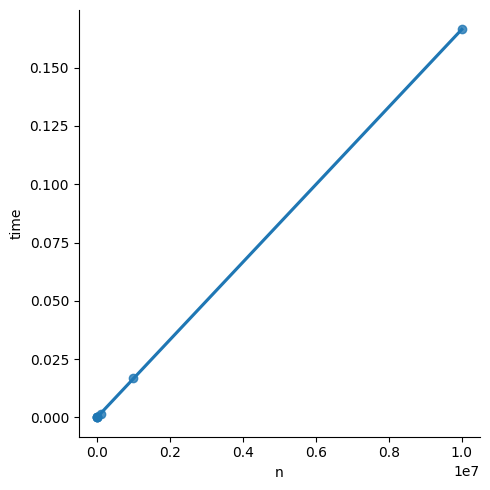

In [26]:
_ = sns.lmplot(x='n', y='time', data=linear_df, ci=None) # linear model (regression) plot


### Polynomial Time

In [27]:
def element_multiplier(my_list): 
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

In [28]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [29]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

In [30]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['n', 'time'])
poly_df

,n,time
0,10,0.000183
1,50,0.000060
2,100,0.000219
3,500,0.005676
4,1000,0.025203
5,5000,0.654645
6,10000,2.659764


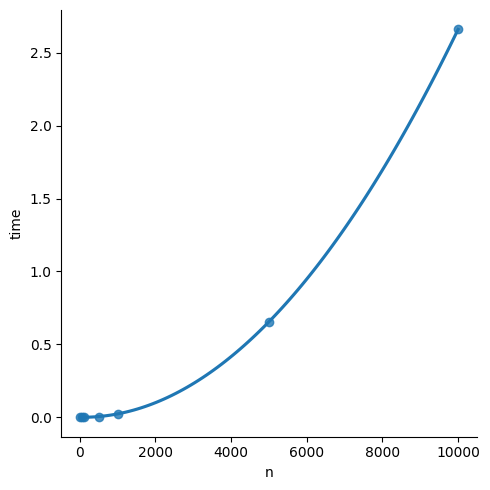

In [31]:
_ = sns.lmplot(x='n', y='time', data=poly_df, ci=None, order=2)

### Array

In [32]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [33]:
x/2.

array([12.5,  1. ,  2.5])

In [34]:
y = torch.tensor([[25, 2, 5], [26, 1, 4]])
y

tensor([[25,  2,  5],
        [26,  1,  4]])

In [35]:
y[0, 2]

tensor(5)

In [36]:
y/2.

tensor([[12.5000,  1.0000,  2.5000],
        [13.0000,  0.5000,  2.0000]])

In [37]:
z = tf.Variable([[[0, 1], [2, 3]], [[25, 26], [7, 9]]], dtype=tf.float16)
z

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float16, numpy=
array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[25., 26.],
        [ 7.,  9.]]], dtype=float16)>

In [38]:
z/2.

<tf.Tensor: shape=(2, 2, 2), dtype=float16, numpy=
array([[[ 0. ,  0.5],
        [ 1. ,  1.5]],

       [[12.5, 13. ],
        [ 3.5,  4.5]]], dtype=float16)>

### Stacks

In [39]:
s = []
s.append('five_of_diamonds') # push
s

['five_of_diamonds']

In [40]:
s.append('queen_of_hearts')
s

['five_of_diamonds', 'queen_of_hearts']

In [41]:
s.append('ace_of_spades')
s

['five_of_diamonds', 'queen_of_hearts', 'ace_of_spades']

In [42]:
s.pop()


'ace_of_spades'

In [43]:
s

['five_of_diamonds', 'queen_of_hearts']

### Searching

In [44]:
def binary_search(array, value):
    
    low = 0
    high = len(array)-1
    
    while low <= high:
        midpoint = (low + high) // 2 # rounds down to nearest integer after division
        if value < array[midpoint]:
            high = midpoint-1
        elif value > array[midpoint]:
            low = midpoint+1
        else:
            return midpoint
    return -1

In [45]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

In [47]:
b.sort() #Uses Quick Sort
b

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

In [48]:
binary_search(b, 255)


-1

In [49]:
binary_search(b, 25)

6

In [50]:
def recursive_binary_search(array, value, low, high):
    
    if low <= high:
        
        midpoint = (low + high) // 2
        
        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

In [51]:
recursive_binary_search(b, 25, 0, len(b)-1)

6

In [52]:
recursive_binary_search(b, 255, 0, len(b)-1)

-1

### Binary Search

In [53]:
def bubble_sort(array):
    
    n = len(array)
    
    for i in range(n-1):
        for j in range(0, n-1): # could be n-i-1 as, e.g., top value is guaranteed to have bubbled up in 1st iteration
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                
    return array

In [54]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

In [55]:
bubble_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

In [57]:
random.sample(range(0, max(granular_list_lengths)), 5) # samples 5 integers w/o replacement from uniform distribution

[2048, 8014, 7092, 3765, 2416]

In [58]:
bubble_times = []

for l in granular_list_lengths[0:7]:
    lst = random.sample(range(0, max(granular_list_lengths)), l)
    
    tic = time.process_time()
    x = bubble_sort(lst)
    toc = time.process_time()
    
    bubble_times.append(toc - tic)

In [59]:
bubble_df = pd.DataFrame(list(zip(granular_list_lengths, bubble_times)), columns=['n', 'time'])
bubble_df

,n,time
0,10,0.000032
1,50,0.000123
2,100,0.000471
3,500,0.013390
4,1000,0.041983
5,5000,0.888501
6,10000,3.582633


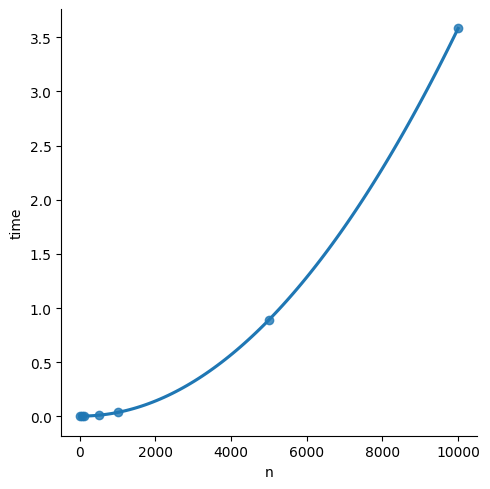

In [60]:
_ = sns.lmplot(x='n', y='time', data=bubble_df, ci=None, order=2)

### Merge Sort

In [68]:
def merge_sort(my_list): 
    
    if len(my_list) > 1: 
        
        # 1. Halve: 
        midpoint = len(my_list) // 2 
        left_half = my_list[:midpoint]
        right_half = my_list[midpoint:]
        
        # 2. Sort (recursively):
        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)
        
        my_list = []
        
        # 3. Merge: 
        while len(left_half)>0 and len(right_half)>0: 
            
            if left_half[0] < right_half[0]:
                my_list.append(left_half.pop(0)) 
            
            else: 
                my_list.append(right_half.pop(0))
                
        for i in left_half:
            my_list.append(i)
        for i in right_half:
            my_list.append(i)
    
    return my_list

In [62]:
m = [25, 2, 5, 14, 22, 11, 96, 1, 101]


In [63]:
merge_sort(m)

[1, 2, 5, 11, 14, 22, 25, 96, 101]

In [64]:
ext_granular_lengths = granular_list_lengths + [50000, 100000] # extended
ext_granular_lengths

[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [65]:
merge_times = []

for l in ext_granular_lengths:
    lst = random.sample(range(0, max(ext_granular_lengths)), l)
    
    tic = time.process_time()
    x = merge_sort(lst)
    toc = time.process_time()
    
    merge_times.append(toc - tic)

In [66]:
merge_df = pd.DataFrame(list(zip(ext_granular_lengths, merge_times)), columns=['n', 'time'])
merge_df

,n,time
0,10,0.000140
1,50,0.000077
2,100,0.000124
3,500,0.000765
4,1000,0.001616
5,5000,0.010969
6,10000,0.021936
7,50000,0.213477
8,100000,0.794143


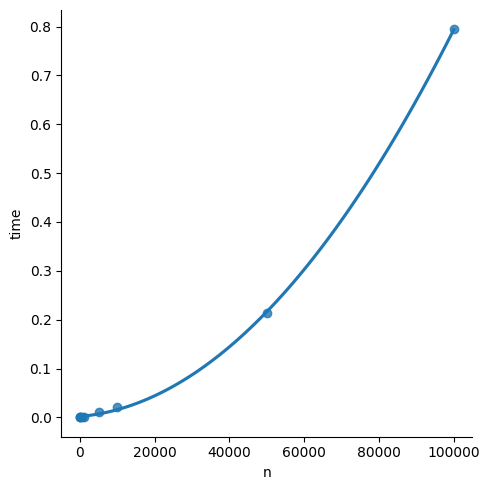

In [67]:
_ = sns.lmplot(x='n', y='time', data=merge_df, ci=None, order=2)

### Quick Sort

In [69]:
def quick_sort(array):
    _quick_sort(array, 0, len(array)-1)
    return array

In [70]:
def _quick_sort(array, low, high): 
    
    if low < high: 
        
        # Result of 2.: Element at "partitioning index" has been pivoted to its correct position
        p_index = partition(array, low, high) 
        
        # 3. Recursively sort the elements below the partitioning index...
        _quick_sort(array, low, p_index-1)
        _quick_sort(array, p_index+1, high)
        
    return array

In [71]:
def partition(array, low, high):
    
    # 1. Use the final element as the pivot:
    pivot = array[high]
    
    i = (low-1) 
    for j in range(low, high): 
        if array[j] < pivot: 
            i = i+1
            array[i], array[j] = array[j], array[i] 

    array[i+1], array[high] = array[high], array[i+1] 
    return(i+1)

In [74]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])

In [75]:
quick_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

In [76]:
list_lengths[:6]

[10, 100, 1000, 10000, 100000, 1000000]

In [77]:
quick_times = []

for l in list_lengths[:6]:
    lst = random.sample(range(0, max(list_lengths[:6])), l)
    
    tic = time.process_time()
    x = quick_sort(lst)
    toc = time.process_time()
    
    quick_times.append(toc - tic)

In [78]:
quick_df = pd.DataFrame(list(zip(list_lengths[:6], quick_times)), columns=['n', 'time'])
quick_df

,n,time
0,10,0.000780
1,100,0.000068
2,1000,0.000866
3,10000,0.010242
4,100000,0.104645
5,1000000,1.113250


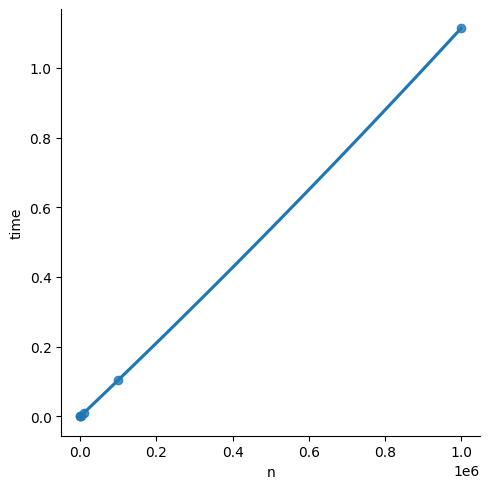

In [79]:
_ = sns.lmplot(x='n', y='time', data=quick_df, ci=None, order=2)

### Maps and Dictionaries

In [ ]:
inventory = {}